In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, pairwise_distances
import matplotlib.pyplot as plt

sns.set()

In [2]:
def plot_confusion_matrix(matrix, name):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.heatmap(matrix, cmap="Blues", annot=True, fmt="d", linewidths=.5)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title("Confusion matrix, without normalization")
    fig.savefig(name)
    plt.show()

def get_rate(matrix):
    tp = 0
    for i in range(10):
        tp = tp + matrix[i,i]
    rate = np.round(tp/matrix.sum(), 3)*100
    #print(f"{tp} digits correctly classified.")
    #print(f"Classifier performance rate: %{int(100*rate)}")
    return rate

In [3]:
class Network:
    def __init__(self, learning_rate):
        df_in = pd.read_csv("data/train_in.csv", header=None)
        df_in.insert(loc=0, column='bias', value=1)
        df_out = pd.read_csv("data/train_out.csv", header=None, names=['label'])
        self.input = df_in.to_numpy()
        self.actual = df_out.to_numpy()
        self.weights = np.random.random((257,10))
        self.learning_rate = learning_rate
        
    def train_network(self, iter_num):
        for num in range(iter_num):
            # All activated nodes as matrix z
            z = np.dot(self.input, self.weights)
            # y_predicted is the prediction
            y_predicted = np.argmax(z, axis=1)
            y_predicted = y_predicted.reshape((y_predicted.shape[0], 1))
            
            misclasssifiedIndexes = np.not_equal(y_predicted, self.actual)
            # iterate over inputs
            for j in range(self.input.shape[0]):
                if misclasssifiedIndexes[j][0]:
                    for i in range(10):
                        if i == self.actual[j][0]:
                            self.weights[:,i] = self.weights[:,i] + self.learning_rate*self.input[j]
                        elif z[j, i] > z[j,self.actual[j][0]]:
                            self.weights[:,i] = self.weights[:,i] - self.learning_rate*self.input[j]
                            
    def modified_training(self, iter_num):
        """
        We updated the learning algorithm with adding an error function. 
        The definition of the error is (d-y) desired - predicted.
        However it can take negative values depend on the value of desired and predicted. 
        Thats why we define the error as;
            Error = 1/2*(d-y)^2
        """
        for num in range(iter_num):
            # All activated nodes as matrix z
            z = np.dot(self.input, self.weights)
            # y_predicted is the prediction
            y_predicted = np.argmax(z, axis=1)
            y_predicted = y_predicted.reshape((y_predicted.shape[0], 1))
            
            misclasssifiedIndexes = np.not_equal(y_predicted, self.actual)
            # iterate over inputs
            for j in range(self.input.shape[0]):
                error = 1/2*(self.actual[j][0] - y_predicted[j][0])**2                
                if misclasssifiedIndexes[j][0]:
                    for i in range(10):
                        if i == self.actual[j][0]:
                            self.weights[:,i] = self.weights[:,i] + self.learning_rate*error*self.input[j]
                        elif z[j, i] > z[j,self.actual[j][0]]:
                            self.weights[:,i] = self.weights[:,i] - self.learning_rate*error*self.input[j]
        
    def predict(self, tSet):
        df = tSet.copy()
        df.insert(loc=0, column='bias', value=1)
        return np.argmax(np.dot(df.to_numpy(), self.weights), axis=1)

In [26]:
def createPlot(interval, tSet, aSet, name, modified=False):
    net = Network(learning_rate=.01)
    rates = []
    intervalSet = np.arange(1, interval+1)
    for i in intervalSet:
        if modified:
            net.modified_training(iter_num = i)
        else:
            net.train_network(iter_num = i)
        pred = net.predict(tSet)
        confx = confusion_matrix(aSet, pred)
        rate = get_rate(confx)
        rates.append(rate)
        
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(intervalSet, rates)
    ax.set_xlabel('Iteration Number')
    ax.set_ylabel('Perceptron Performance Rate')
    ax.set_title("Classifier performance based on iteration number")
    fig.savefig(name)
    plt.show()

In [5]:
trainSet = pd.read_csv("data/train_in.csv", header=None)
actualTrainLabels = pd.read_csv("data/train_out.csv", header=None)
testSet = pd.read_csv("data/test_in.csv", header=None)
actualTestLabels = pd.read_csv("data/test_out.csv", header=None)

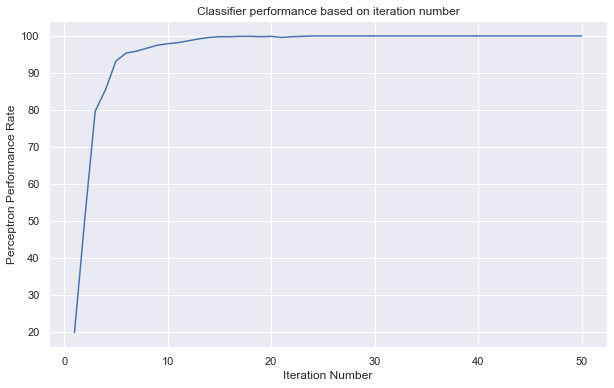

In [14]:
name = "./images/Perceptron_50_iterations_with_1_learningRate.png"
createPlot(50, trainSet, actualTrainLabels, name=name, modified=False)

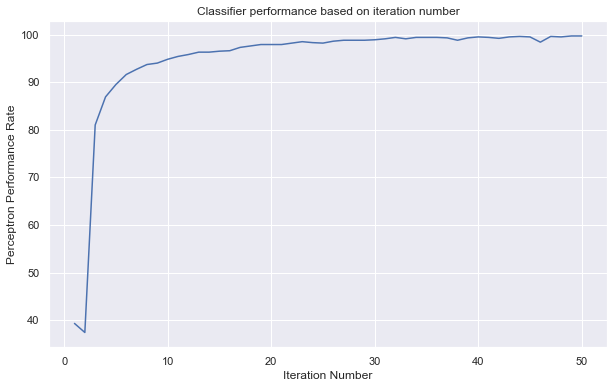

In [19]:
name = "./images/Perceptron_50_iteration_modified_with_0.01_learningRate.png"
createPlot(50, trainSet, actualTrainLabels, name=name, modified=True)

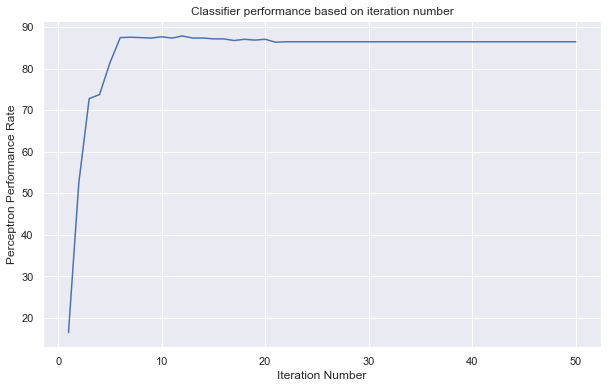

In [27]:
name = "./images/Perceptron_50_iterations_with_0.01_learningRateTest.png"
createPlot(50, testSet, actualTestLabels, name=name, modified=False)

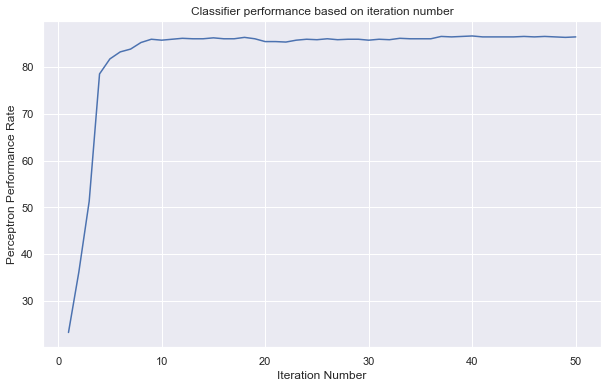

In [29]:
name = "./images/Perceptron_50_iterations_with_0.01_learningRateTestModified.png"
createPlot(50, testSet, actualTestLabels, name=name, modified=True)